# Part I: Import the Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

# Part II : Load The Raw Data

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
train.shape, test.shape

((1460, 81), (1459, 80))

In [5]:
# Train has one more column the predictor variable
print(set(train.columns) - set(test.columns) )

{'SalePrice'}


In [6]:
print(train.info())
print('-------------------------')
print(test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [7]:
train.drop(['Id'], axis=1, inplace=True)


In [8]:
test.drop(['Id'], axis=1, inplace=True)

In [9]:

train.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [10]:
print(train.select_dtypes(include=['object']).shape)
print(train.select_dtypes(exclude=['object']).shape)

(1460, 43)
(1460, 37)


# Part III: Relationship Between The Dependent Variable And Independent Variable

Use heatmap to check the correlation between all numeric variables

<AxesSubplot:>

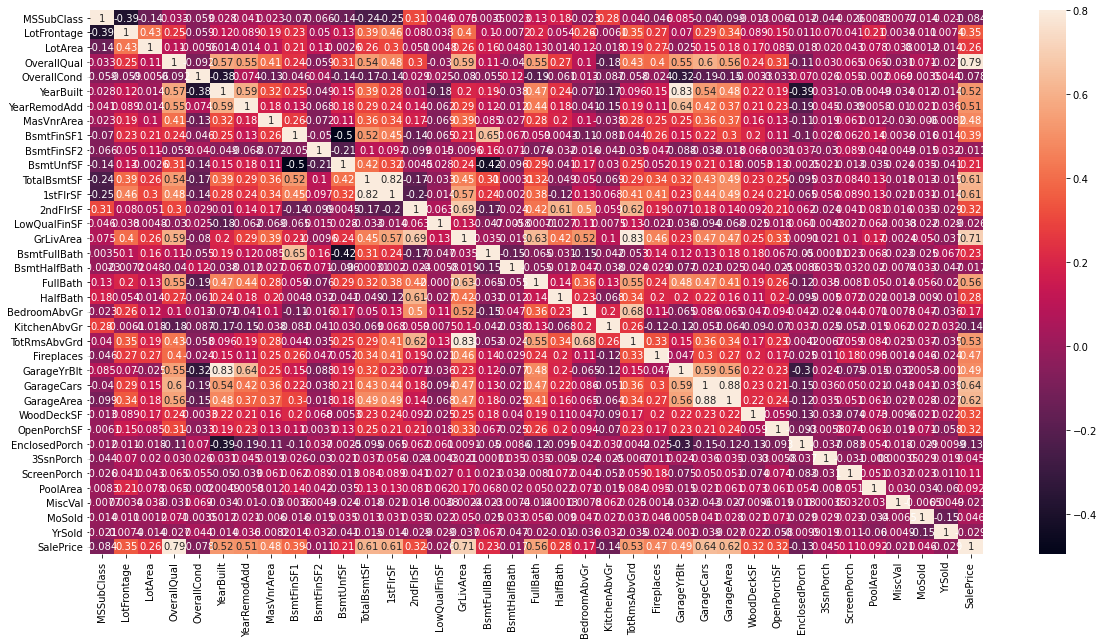

In [11]:
plt.figure(figsize=(20,10))
sns.heatmap(train.corr(), annot=True, vmax=0.8)

In [12]:
column_names = train.select_dtypes(exclude=['object']).columns
column_names

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [13]:
train['GarageYrBlt']

0       2003.0
1       1976.0
2       2001.0
3       1998.0
4       2000.0
         ...  
1455    1999.0
1456    1978.0
1457    1941.0
1458    1950.0
1459    1965.0
Name: GarageYrBlt, Length: 1460, dtype: float64

In [14]:
def checking_muticollinarity(dataset, feature):
    corelation_values = dict(dataset.corr()[feature].abs().sort_values(ascending = False)[1:])
    for feat, value in corelation_values.items():
        if feat != 'SalePrice':
            if value > 0.7:
                dataset.drop([feat], axis = 1,inplace = True)
                print(feat)
    return dataset


In [15]:
#YearBuilt and GarageYrBlt, this is reasonable since many times YearBuilt and GarageYrBlt will be the same. Drop GarageYrBlt
train = checking_muticollinarity(train, 'YearBuilt')

GarageYrBlt


In [16]:
#1stFlrSF and TotalBsmtSF, drop 
train = checking_muticollinarity(train, '1stFlrSF')

TotalBsmtSF


In [17]:
train.drop(['TotRmsAbvGrd',], axis=1, inplace=True)
test.drop(['GarageYrBlt','TotRmsAbvGrd','TotalBsmtSF'], axis=1, inplace=True)

# Outliers

<AxesSubplot:xlabel='OverallQual', ylabel='SalePrice'>

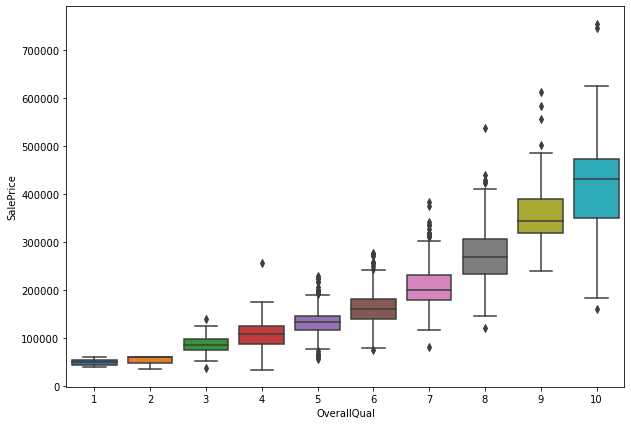

In [18]:
# Box-plot to check relationship between SalePrice and OverallQual
plt.figure(figsize=(10,7))
sns.boxplot(x='OverallQual', y='SalePrice', data=train)

1298    5642
523     4676
Name: GrLivArea, dtype: int64

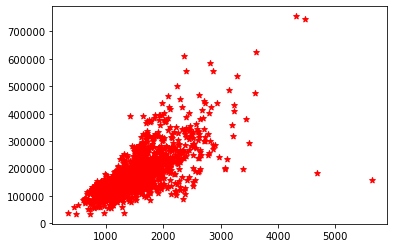

In [19]:
plt.scatter(x='GrLivArea', y='SalePrice', data=train, color='r', marker='*')
train['GrLivArea'].sort_values(ascending=False).head(2)

From the scatter plot, there are two outliers with gross living area 5642, 4676 but the SalePrice is low. We will drop these two outliers by index

In [20]:
train.index[[523, 1298]]

Int64Index([523, 1298], dtype='int64')

In [21]:
print(train.shape)
train.drop(train.index[[523, 1298]], inplace=True)
print(train.shape)

(1460, 77)
(1458, 77)


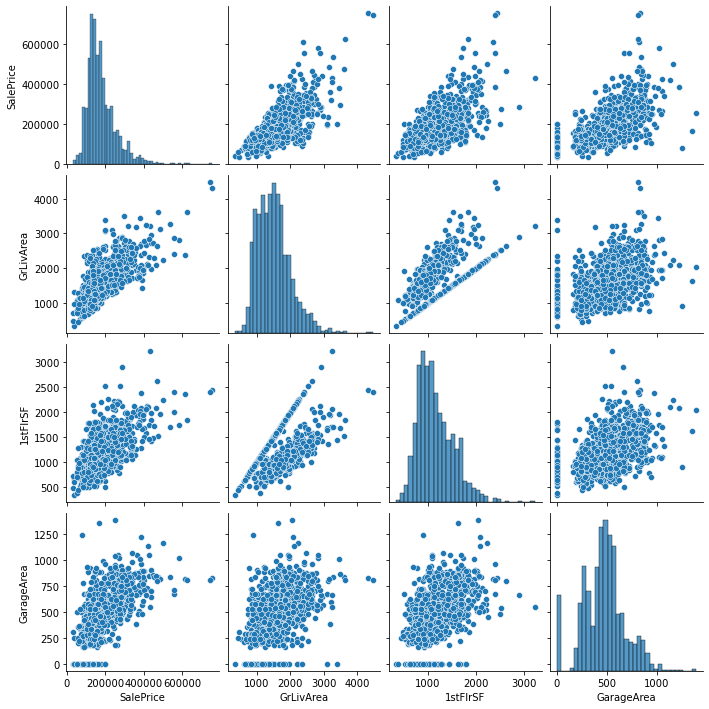

In [22]:
box_feature=['SalePrice','OverallQual','GarageCars','FullBath', 'YearBuilt','YearRemodAdd','Fireplaces']
scatter_feature=['SalePrice', 'GrLivArea','1stFlrSF','GarageArea']
# Use sns.pairplot to check the relationship between the SalePrice and top 10 correlated features
sns.pairplot(train[scatter_feature])

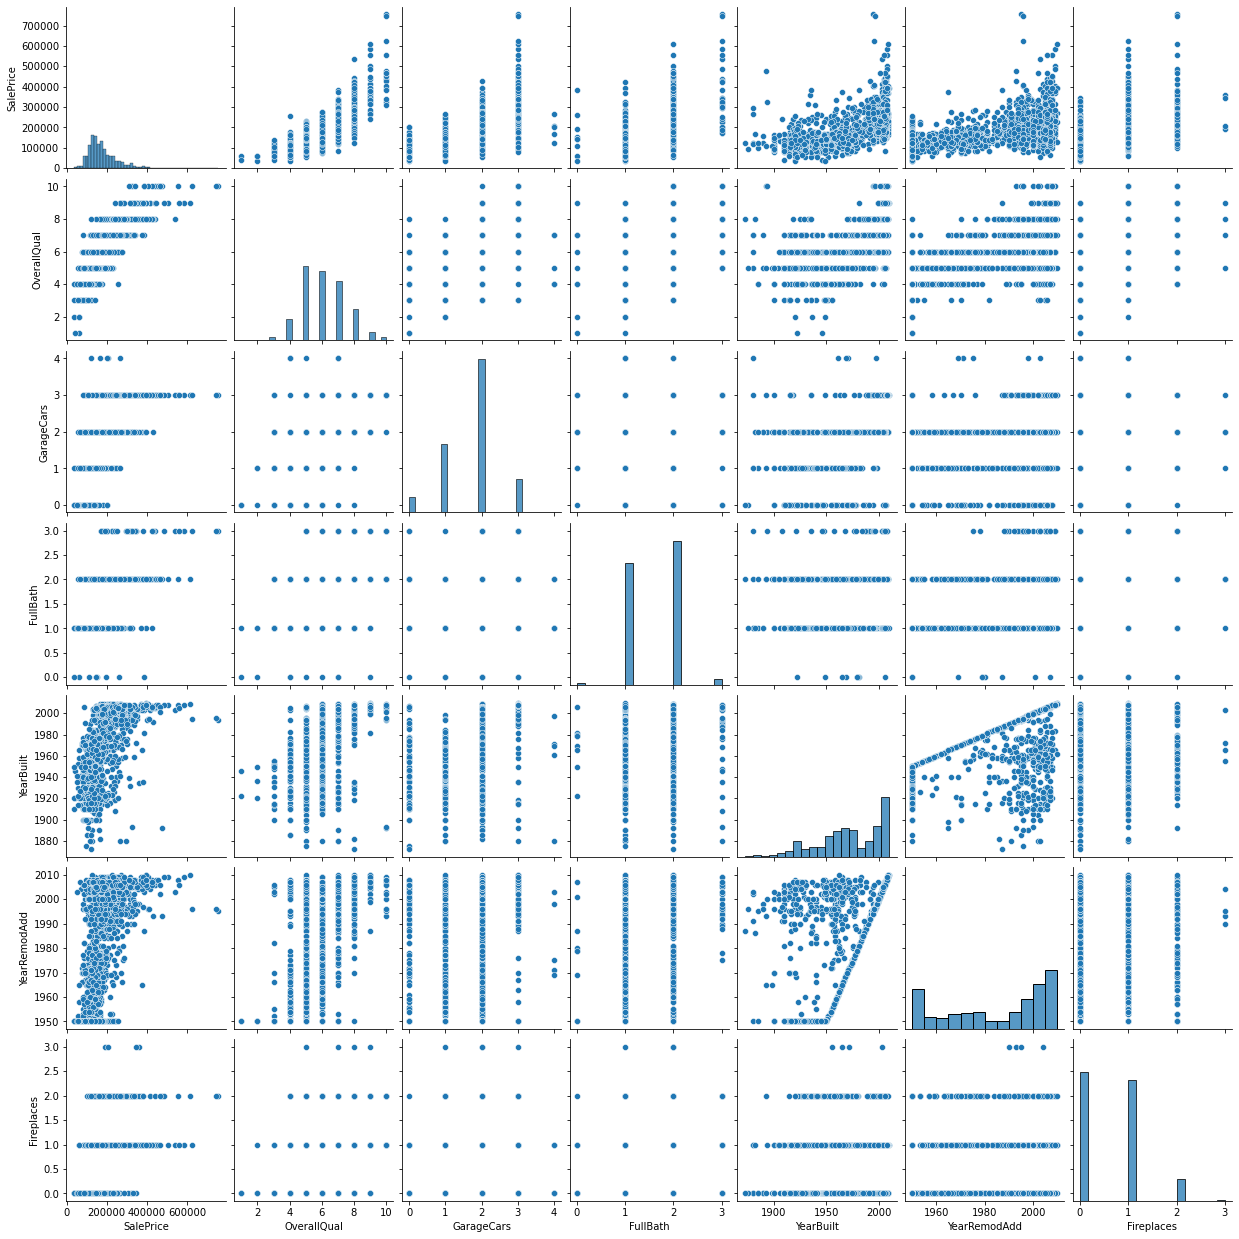

In [23]:
sns.pairplot(train[box_feature], kind='scatter', diag_kind='hist')

In [24]:
train.isnull().sum().sort_values(ascending=False)

PoolQC           1452
MiscFeature      1404
Alley            1367
Fence            1177
FireplaceQu       690
                 ... 
CentralAir          0
SaleCondition       0
Heating             0
BsmtUnfSF           0
MSSubClass          0
Length: 77, dtype: int64

In [25]:
train_nan_pct=(train.isnull().sum())/(train.isnull().count())
train_nan_pct=train_nan_pct[train_nan_pct>0]
train_nan_pct.sort_values(ascending=False)

PoolQC          0.995885
MiscFeature     0.962963
Alley           0.937586
Fence           0.807270
FireplaceQu     0.473251
LotFrontage     0.177641
GarageType      0.055556
GarageFinish    0.055556
GarageQual      0.055556
GarageCond      0.055556
BsmtExposure    0.026063
BsmtFinType2    0.026063
BsmtFinType1    0.025377
BsmtCond        0.025377
BsmtQual        0.025377
MasVnrArea      0.005487
MasVnrType      0.005487
Electrical      0.000686
dtype: float64

In [26]:
train.drop(['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu'], axis=1, inplace=True)
test.drop(['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu'], axis=1, inplace=True)

In [27]:
train_impute_index=train_nan_pct[train_nan_pct<0.3].index
train_impute_index
train_impute_mode=['MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']
train_impute_median=['LotFrontage', 'MasVnrArea']

In [28]:
#for object features
for feature in train_impute_mode:
    train[feature].fillna(train[feature].mode()[0], inplace=True)
    test[feature].fillna(test[feature].mode()[0], inplace=True)

In [29]:
#for numerical feature
for feature in train_impute_median:
    train[feature].fillna(train[feature].median(), inplace=True)
    test[feature].fillna(test[feature].median(), inplace=True)

In [30]:
train.isnull().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 72, dtype: int64

In [31]:
test_only_nan=test.isnull().sum().sort_values(ascending=False)
test_only_nan=test_only_nan[test_only_nan>0]
print(test_only_nan.index)
test_impute_mode=['MSZoning', 'BsmtFullBath', 'Utilities','BsmtHalfBath', 'Functional', 'SaleType', 'Exterior2nd', 'Exterior1st', 'GarageCars', 'KitchenQual']
test_impute_median=['BsmtFinSF2','GarageArea', 'BsmtFinSF1','BsmtUnfSF' ]

Index(['MSZoning', 'Utilities', 'BsmtFullBath', 'BsmtHalfBath', 'Functional',
       'BsmtUnfSF', 'GarageArea', 'BsmtFinSF1', 'BsmtFinSF2', 'SaleType',
       'Exterior2nd', 'Exterior1st', 'GarageCars', 'KitchenQual'],
      dtype='object')


In [32]:
for feature in test_impute_mode:
    test[feature].fillna(test[feature].mode()[0], inplace=True)
for feature in test_impute_median:
    test[feature].fillna(test[feature].median(), inplace=True)

In [33]:
# Now there are no NAN values in both train and test data
test.isnull().sum().sort_values(ascending=False).head(5)

SaleCondition    0
ExterQual        0
RoofStyle        0
RoofMatl         0
Exterior1st      0
dtype: int64

# Part IV: Check the dependent variable

C:\Users\97798\anaconda\envs\Deep Learning\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

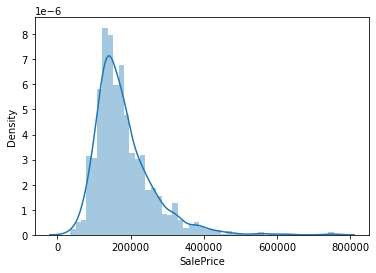

In [34]:
sns.distplot(train['SalePrice'])

It is a rigth skwed so we use log1p distribution

C:\Users\97798\anaconda\envs\Deep Learning\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Log SalePrice', ylabel='Density'>

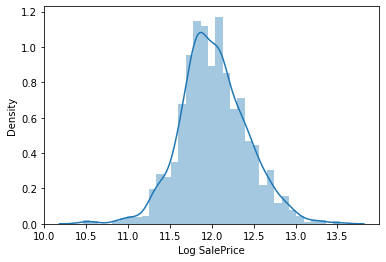

In [35]:
train['Log SalePrice']=np.log1p(train['SalePrice'])
sns.distplot(train['Log SalePrice'])

# Part V :Train Validation split on the training data

In [36]:
train = pd.get_dummies(train)
test = pd.get_dummies(test)

In [37]:
X_train, X_val, y_train, y_val=train_test_split(train, train[['SalePrice']], test_size=0.3, random_state=100)

In [38]:
X_train.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
653,50,60.0,10320,6,7,1906,1995,0.0,0,0,...,0,0,0,1,0,0,0,0,1,0
342,90,69.0,8544,3,4,1949,1950,340.0,0,0,...,0,0,0,1,0,0,0,0,1,0
114,70,61.0,7259,6,8,1945,2002,0.0,774,150,...,0,0,0,1,0,0,0,0,1,0
806,80,75.0,9750,5,5,1967,1967,0.0,400,480,...,0,0,0,1,0,0,0,0,1,0
365,70,59.0,10690,5,7,1920,1997,0.0,456,0,...,0,0,0,1,0,0,0,0,1,0


In [39]:
ridge=Ridge(alpha=0.3, copy_X=True, fit_intercept=True)
ridge.fit(X_train, y_train)
predict=ridge.predict(X_val)

In [40]:
np.sqrt(mean_squared_error(predict, y_val))

2.026200391216137e-08

[6.198612025031162e-09, 2.7240244294516615e-09, 7.3235085608568965e-09, 2.026200391216137e-08, 5.993904939329157e-08, 1.5517370853715437e-07, 4.433322313713246e-07, 1.1773739624297576e-06]
1
2.7240244294516615e-09


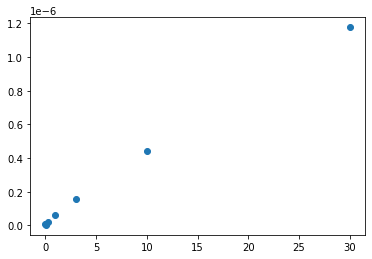

In [41]:
rmse=[]
alpha=[0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30]

for alph in alpha:
    ridge=Ridge(alpha=alph, copy_X=True, fit_intercept=True)
    ridge.fit(X_train, y_train)
    predict=ridge.predict(X_val)
    rmse.append(np.sqrt(mean_squared_error(predict, y_val)))
print(rmse)
plt.scatter(alpha, rmse)
rmse=pd.Series(rmse, index=alpha)
print(rmse.argmin())
print(rmse.min())